Let's start by pulling in data.  
(side note: that "sys.path.append" is telling Python to look for project_1 in the folder one level above this one)

In [1]:
%matplotlib inline
import sys
sys.path.append('..')

from project_1.loaddata import get_boxofficemojo_movies
movie_list = get_boxofficemojo_movies()

Parsed 3728 movies from 3728 files


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
movies = pd.DataFrame(movie_list)
movies.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",3454,269784201,2008
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,2704,183611771,2000
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,2311,53478166,1999
3,10 Years (2012),Jamie Linden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,63,203373,2012
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,2,NaN,2013


Scatter plots can help us identify the shapes of relationships between features.

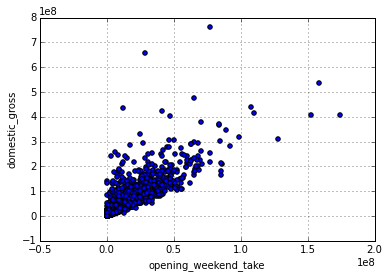

In [3]:
movies.plot(kind='scatter', x='opening_weekend_take', y='domestic_gross')

The above plot is servicible, but could be better...

Seaborn to the rescue!

Seaborn is a library that works on top of Matplotlib. It sets nice defaults for graphs and makes certain difficult graphs easier. 

In some ways, Seaborn : Matplotlib :: Pandas : Numpy

In [4]:
import seaborn

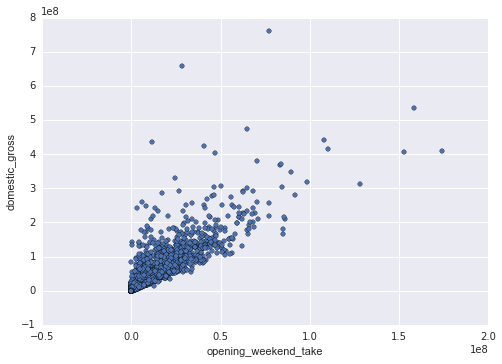

In [5]:
movies.plot(kind='scatter', x='opening_weekend_take', y='domestic_gross')

There's those nicer defaults at work. Lets tweak things even more.

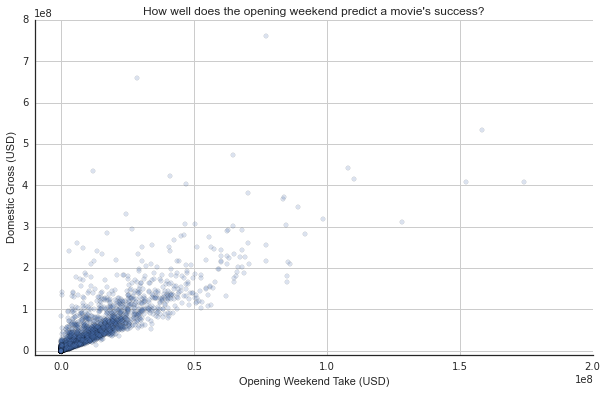

In [6]:
with seaborn.axes_style('white'):
    plot = movies.plot(kind='scatter', 
                      x='opening_weekend_take', 
                      y='domestic_gross', 
                      alpha=0.2,
                      figsize=(10,6))
    seaborn.despine()
    plot.set_title("How well does the opening weekend predict a movie's success?")
    plot.set_xlim(-.1e8)
    plot.set_ylim(-.1e8)
    plot.set_xlabel('Opening Weekend Take (USD)')
    plot.set_ylabel('Domestic Gross (USD)')

In [7]:
seaborn.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

`axes_style()` is just a dictionary of settings; you can customize them further yourself!

See [Seaborn docs](http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#overriding-elements-of-the-seaborn-styles) for more details.

Let's throw our regression model over top of the scatter plot as an "eye test".

In [8]:
import statsmodels.api as sm

clean_movies = movies[['domestic_gross','opening_weekend_take']].dropna()

Y = clean_movies.domestic_gross
X = sm.add_constant(clean_movies.opening_weekend_take)

linmodel = sm.OLS(Y,X).fit()

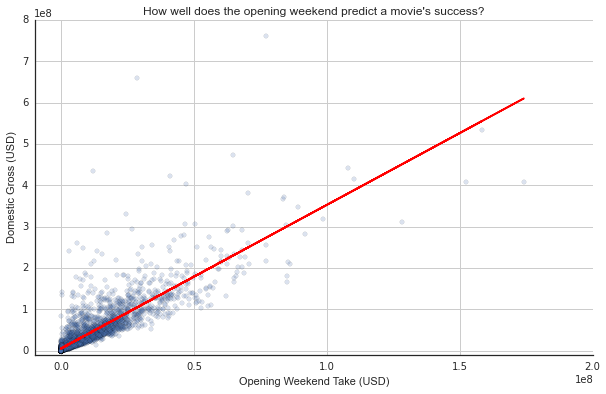

In [9]:
predicted = linmodel.predict()
with seaborn.axes_style('white'):
    plot = movies.plot(kind='scatter', 
                      x='opening_weekend_take', 
                      y='domestic_gross', 
                      alpha=0.2,
                      figsize=(10,6))
    seaborn.despine()
    plot.set_title("How well does the opening weekend predict a movie's success?")
    plot.set_xlim(-.1e8)
    plot.set_ylim(-.1e8)
    plot.set_xlabel('Opening Weekend Take (USD)')
    plot.set_ylabel('Domestic Gross (USD)')
    plt.plot(clean_movies.opening_weekend_take, predicted, 'r')

Nice. To make a plot like that even faster (with 95% confidence intervals too), Seaborn has a built in plot especially designed for regressions:

In [11]:
predicted = pd.Series(predicted)
regression = pd.concat([clean_movies, predicted], axis=1)
regression

,domestic_gross,opening_weekend_take,0
0,94784201,35867488,1.299783e+08
1,66957026,19883351,7.445943e+07
2,38178166,8330681,3.433272e+07
3,203373,22707,5.476043e+06
4,9213,3516,5.409386e+06
5,707343,60853,5.608539e+06
6,18335230,2136801,1.281908e+07
7,12234694,5329240,2.390760e+07
8,802778,45854,5.556442e+06
9,57231747,21054283,7.852651e+07


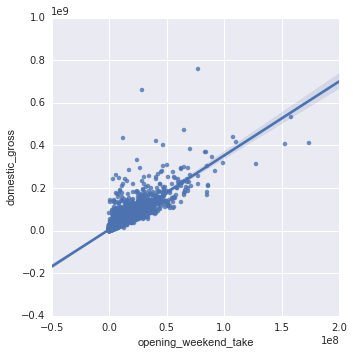

In [12]:
seaborn.lmplot(x="opening_weekend_take", 
               y="domestic_gross", data=regression)

Also, remember how plotting the residuals took forever the other day? One line in Seaborn:

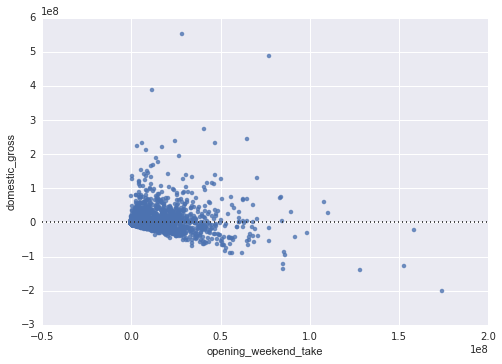

In [13]:
seaborn.residplot("opening_weekend_take", "domestic_gross", data=regression)

Seaborn also has some built in functions to make doing multiples across a category easier:

In [14]:
N = 4
top_directors = movies.director.value_counts().index[:N]
top_dir_movies = movies[movies['director'].isin(top_directors)]

print '%i movies by top %i directors: %s.' % (len(top_dir_movies),
                                              N,
                                              ', '.join(top_directors))

68 movies by top 4 directors: Steven Spielberg, Woody Allen, Ridley Scott, Joel Schumacher.


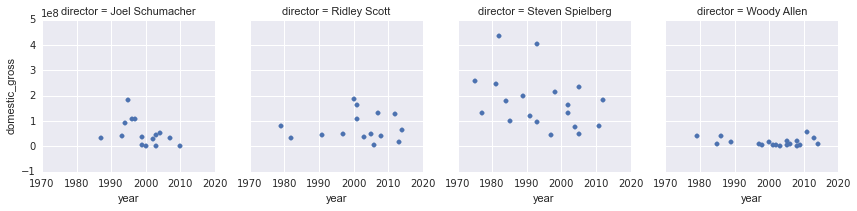

In [16]:
by_director = seaborn.FacetGrid(top_dir_movies, col="director")
by_director.map(plt.scatter, "year", "domestic_gross")

## Check out Seaborn's other capabilites at [their documentation](http://stanford.edu/~mwaskom/software/seaborn/index.html).
## Pandas [plotting functions](http://pandas.pydata.org/pandas-docs/stable/visualization.html) also are great for getting quick basic plots.